In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("churn_file.csv")
data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data.tail()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,66,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
data.nunique()

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
data.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data.corr()

<ipython-input-6-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


In [ ]:
data.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data["PhoneService"] = label_encoder.fit_transform(data["PhoneService"])
data["Contract"] = label_encoder.fit_transform(data["Contract"])
data["PaperlessBilling"] = label_encoder.fit_transform(data["PaperlessBilling"])
data["PaymentMethod"] = label_encoder.fit_transform(data["PaymentMethod"])
data["Churn"] = label_encoder.fit_transform(data["Churn"])
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,34,1,1,0,3,56.95,1889.5,0
2,3668-QPYBK,2,1,0,1,3,53.85,108.15,1
3,7795-CFOCW,45,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,2,1,0,1,2,70.70,151.65,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   int64  
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   int64  
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 495.3+ KB


In [ ]:
data["TotalCharges"] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')
data=data.replace(np.nan,0,regex=True)

In [ ]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,34,1,1,0,3,56.95,1889.50,0
2,3668-QPYBK,2,1,0,1,3,53.85,108.15,1
3,7795-CFOCW,45,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,2,1,0,1,2,70.70,151.65,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   int64  
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   int64  
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 495.3+ KB


In [ ]:
data.drop('customerID',inplace=True, axis=1)

In [ ]:
data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,2,29.85,29.85,0
1,34,1,1,0,3,56.95,1889.50,0
2,2,1,0,1,3,53.85,108.15,1
3,45,0,1,0,0,42.30,1840.75,0
4,2,1,0,1,2,70.70,151.65,1


In [ ]:
data.dtypes

tenure                int64
PhoneService          int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
model_1=Ridge(alpha=0.5)
model_1.fit(X_train,Y_train)

Ridge(alpha=0.5)

In [ ]:
y_pred_1=model_1.predict(X_test)
y_pred_1

array([0.25444311, 0.20019708, 0.50987595, ..., 0.23365462, 0.34544093,
       0.4235338 ])

In [ ]:
ac_1=accuracy_score(y_pred_1.round(),Y_test)
ac_1

0.7771469127040455

In [ ]:
cm_1=confusion_matrix(Y_test,y_pred_1.round())
cm_1

array([[935, 106],
       [208, 160]])

<Axes: >

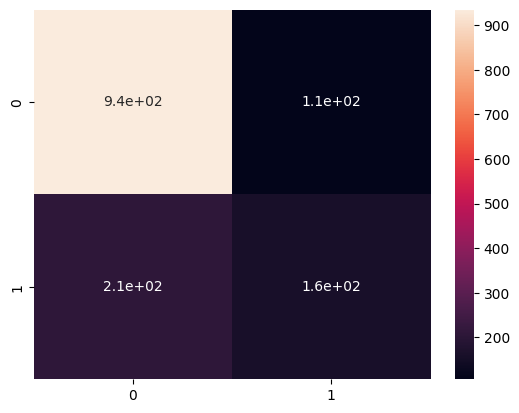

In [ ]:
sns.heatmap(cm_1,annot=True)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_2=LogisticRegression(random_state=0)
model_2.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_2=model_2.predict(X_test)
y_pred_2

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
ac_2=accuracy_score(y_pred_2,Y_test)
ac_2

0.7806955287437899

In [ ]:
cm_2=confusion_matrix(Y_test,y_pred_2)
cm_2

array([[927, 114],
       [195, 173]])

<Axes: >

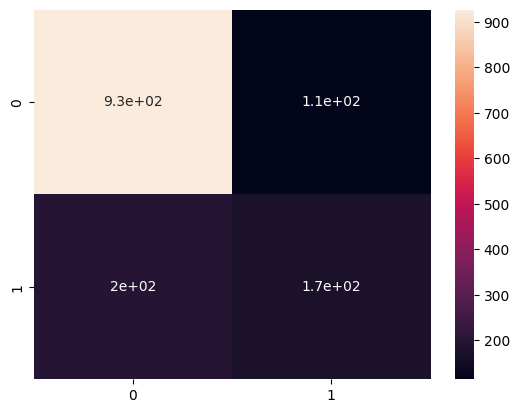

In [ ]:
sns.heatmap(cm_2,annot=True)

**Linear Discriminant Analysis**

In [ ]:
 from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 model_3=LinearDiscriminantAnalysis()
 model_3.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_3=model_3.predict(X_test)
y_pred_3

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
ac_3=accuracy_score(y_pred_3,Y_test)
ac_3

0.7778566359119943

In [ ]:
cm_3=confusion_matrix(Y_test,y_pred_3)
cm_3

array([[921, 120],
       [193, 175]])

<Axes: >

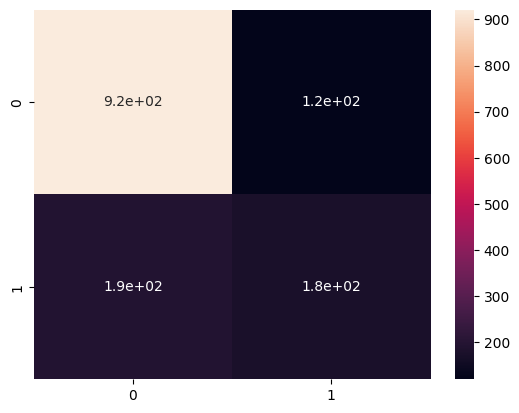

In [ ]:
sns.heatmap(cm_3,annot=True)

**Quadratic Discriminant Analysis**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model_4=QuadraticDiscriminantAnalysis()
model_4.fit(X_train,Y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
y_pred_4=model_4.predict(X_test)
y_pred_4

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
ac_4=accuracy_score(y_pred_4,Y_test)
ac_4

0.7558552164655784

In [ ]:
cm_4=confusion_matrix(Y_test,y_pred_4)
cm_4

array([[828, 213],
       [131, 237]])

**SGD Classification**

In [ ]:
from sklearn.linear_model import SGDClassifier
model_5=SGDClassifier(max_iter=10)
model_5.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=10)

In [ ]:
y_pred_5=model_5.predict(X_test)
y_pred_5

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ac_5=accuracy_score(y_pred_5,Y_test)
ac_5

0.7565649396735273

In [ ]:
cm_5=confusion_matrix(Y_test,y_pred_5)
cm_5

array([[879, 162],
       [181, 187]])

**Support Vector Machine**

In [ ]:
 from sklearn.svm import SVC
 model_6=SVC(degree=3)
 model_6.fit(X_train,Y_train)

SVC()

In [ ]:
y_pred_6=model_6.predict(X_test)
y_pred_6

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
ac_6=accuracy_score(y_pred_6,Y_test)
ac_6

0.7849538679914834

In [ ]:
cm_6=confusion_matrix(Y_test,y_pred_6)
cm_6

array([[951,  90],
       [213, 155]])

**K Nearest Neighbor Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_7=KNeighborsClassifier(n_neighbors=5)
model_7.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
y_pred_7=model_7.predict(X_test)
y_pred_7


array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
ac_7=accuracy_score(y_pred_7,Y_test)
ac_7

0.7750177430801988

In [ ]:
cm_7=confusion_matrix(Y_test,y_pred_7)
cm_7

array([[907, 134],
       [183, 185]])

**Gaussian Navie Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_8=GaussianNB()
model_8.fit(X_train,Y_train)

GaussianNB()

In [ ]:
y_pred_8=model_8.predict(X_test)
y_pred_8


array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
ac_8=accuracy_score(y_pred_8,Y_test)
ac_8

0.7210787792760823

In [ ]:
cm_8=confusion_matrix(Y_test,y_pred_8)
cm_8

array([[776, 265],
       [128, 240]])

**Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_9=DecisionTreeClassifier(random_state=0)
model_9.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.6248030498541695, 0.9807692307692307, 'x[1] <= -0.222\ngini = 0.391\nsamples = 5634\nvalue = [4133, 1501]'),
 Text(0.34471800572041544, 0.9423076923076923, 'x[4] <= 0.126\ngini = 0.49\nsamples = 3113\nvalue = [1772, 1341]'),
 Text(0.1540536958109084, 0.9038461538461539, 'x[5] <= -0.908\ngini = 0.418\nsamples = 1313\nvalue = [923, 390]'),
 Text(0.07071732861315305, 0.8653846153846154, 'x[4] <= -1.462\ngini = 0.484\nsamples = 615\nvalue = [362, 253]'),
 Text(0.03877330007876083, 0.8269230769230769, 'x[5] <= -0.991\ngini = 0.381\nsamples = 266\nvalue = [198, 68]'),
 Text(0.02188894723024416, 0.7884615384615384, 'x[4] <= -1.489\ngini = 0.472\nsamples = 123\nvalue = [76, 47]'),
 Text(0.00820425308479916, 0.75, 'x[3] <= -0.074\ngini = 0.429\nsamples = 77\nvalue = [53, 24]'),
 Text(0.002100288789708585, 0.7115384615384616, 'x[4] <= -1.494\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.0010501443948542925, 0.6730769230769231, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0

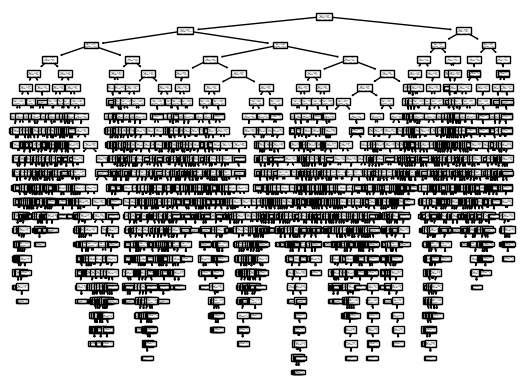

In [ ]:
from sklearn import tree
tree.plot_tree(model_9)

In [ ]:
y_pred_9=model_9.predict(X_test)
y_pred_9

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
ac_9=accuracy_score(y_pred_9,Y_test)
ac_9

0.7274662881476224

In [ ]:
cm_9=confusion_matrix(Y_test,y_pred_9)
cm_9

array([[846, 195],
       [189, 179]])

<Axes: >

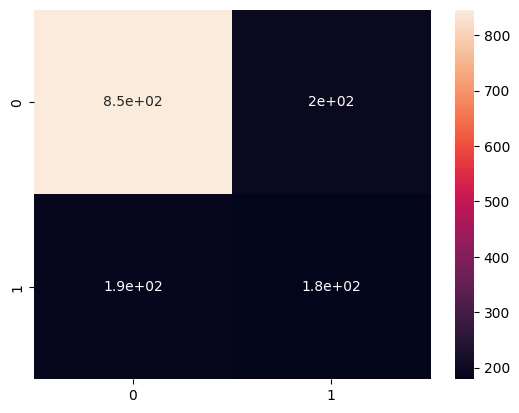

In [ ]:
sns.heatmap(cm_9,annot=True)

**RandomForest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_10=RandomForestClassifier(n_estimators=15)
model_10.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=15)

In [ ]:
y_pred_10=model_10.predict(X_test)
y_pred_10

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
ac_10=accuracy_score(y_pred_10,Y_test)
ac_10

0.765791341376863

In [ ]:
cm_10=confusion_matrix(Y_test,y_pred_10)
cm_10

array([[909, 132],
       [198, 170]])

**ExtraTrees Classification**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_11=ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
model_11.fit(X_train,Y_train)

ExtraTreesClassifier(n_estimators=10, random_state=0)

In [ ]:
y_pred_11=model_11.predict(X_test)
y_pred_11


array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
ac_11=accuracy_score(y_pred_11,Y_test)
ac_11

0.7558552164655784

In [ ]:
cm_11=confusion_matrix(Y_test,y_pred_11)
cm_11

array([[902, 139],
       [205, 163]])

**AdaBoost Classification**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_12=AdaBoostClassifier(n_estimators=100)
model_12.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
y_pred_12=model_12.predict(X_test)
y_pred_12

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
ac_12=accuracy_score(y_pred_12,Y_test)
ac_12

0.7863733144073811

In [ ]:
cm_12=confusion_matrix(Y_test,y_pred_12)
cm_12

array([[921, 120],
       [181, 187]])

<Axes: >

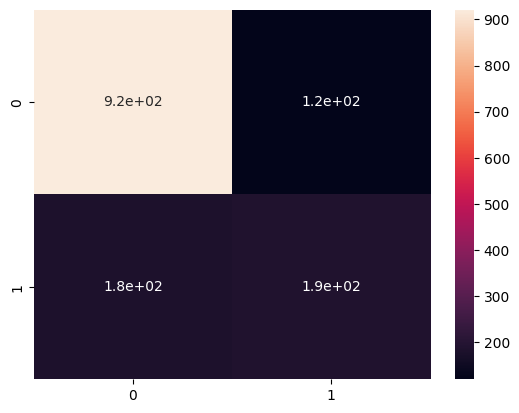

In [ ]:
sns.heatmap(cm_12,annot=True)

**One Vs Rest Classification**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
model_13=OneVsRestClassifier(LinearSVC(random_state=0))
model_13.fit(X_train,Y_train)

OneVsRestClassifier(estimator=LinearSVC(random_state=0))

In [ ]:
y_pred_13=model_13.predict(X_test)
y_pred_13

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
ac_13=accuracy_score(y_pred_13,Y_test)
ac_13

0.7799858055358411

In [ ]:
cm_13=confusion_matrix(Y_test,y_pred_13)
cm_13

array([[932, 109],
       [201, 167]])

**Partial Least Square Canonical**

In [ ]:
from sklearn.cross_decomposition import PLSCanonical
model_14=PLSCanonical(n_components=1)
model_14.fit(X_train,Y_train)

PLSCanonical(n_components=1)

In [ ]:
y_pred_14=model_14.predict(X_test)
y_pred_14

array([[0.05289991],
       [0.13324307],
       [0.84788754],
       ...,
       [0.24571866],
       [0.53305937],
       [0.86742037]])

In [ ]:
ac_14=accuracy_score(y_pred_14.round(),Y_test)
ac_14

0.6217175301632364

In [ ]:
cm_14=confusion_matrix(Y_test,y_pred_14.round())
cm_14

array([[  0,   0,   0],
       [138, 620, 283],
       [  5, 107, 256]])

**Multilayer Perceptron Classification**

In [ ]:
from sklearn.neural_network import MLPClassifier
model_15=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model_15.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
y_pred_15=model_15.predict(X_test)
y_pred_15

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
ac_15=accuracy_score(y_pred_15,Y_test)
ac_15

0.7799858055358411

In [ ]:
cm_15=confusion_matrix(Y_test,y_pred_15)
cm_15

array([[916, 125],
       [185, 183]])

<Axes: >

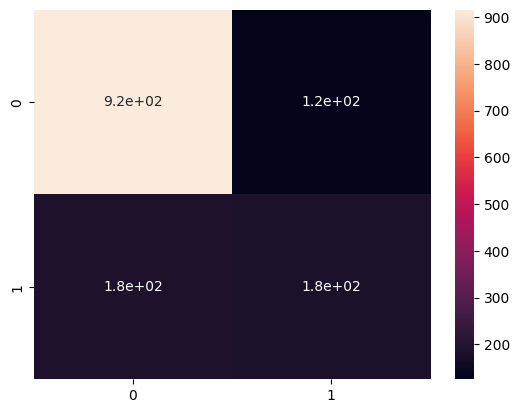

In [ ]:
sns.heatmap(cm_15,annot=True)

In [ ]:
data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,2,29.85,29.85,0
1,34,1,1,0,3,56.95,1889.50,0
2,2,1,0,1,3,53.85,108.15,1
3,45,0,1,0,0,42.30,1840.75,0
4,2,1,0,1,2,70.70,151.65,1


In [ ]:
import seaborn as sns

<ipython-input-91-dc918524a6f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

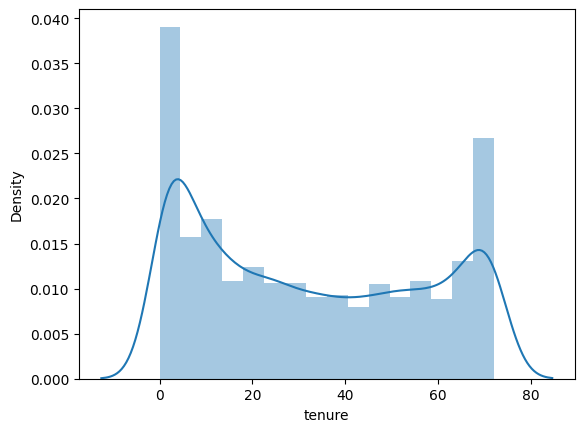

In [ ]:
sns.distplot(data['tenure'])

<ipython-input-92-ea297108825c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['tenure'],kde=False)


<Axes: xlabel='tenure'>

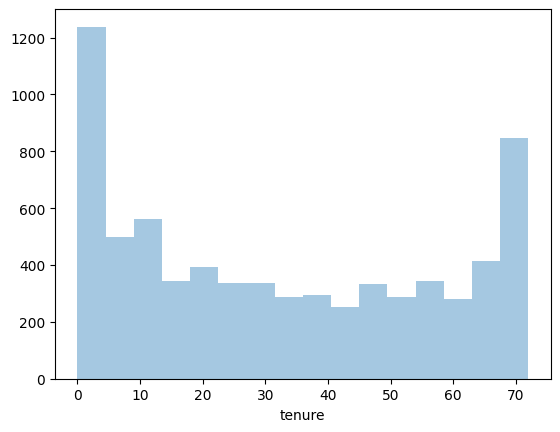

In [ ]:
sns.distplot(data['tenure'],kde=False)

<ipython-input-93-3d8005a58388>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Contract'],kde=False,bins=10)


<Axes: xlabel='Contract'>

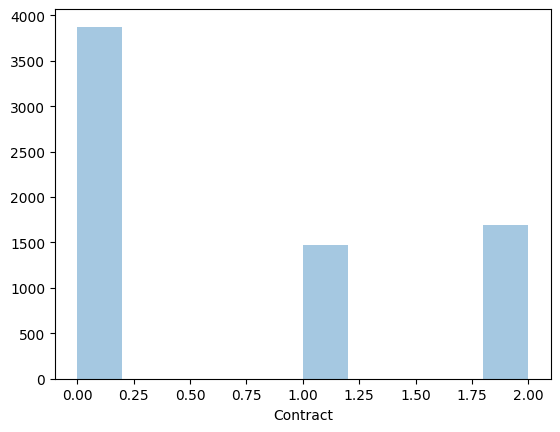

In [ ]:
sns.distplot(data['Contract'],kde=False,bins=10)

<Axes: xlabel='Contract', ylabel='Density'>

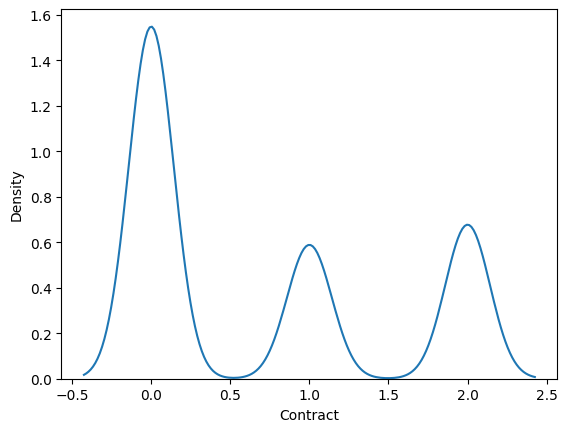

In [ ]:
sns.kdeplot(data['Contract'])

<Axes: >

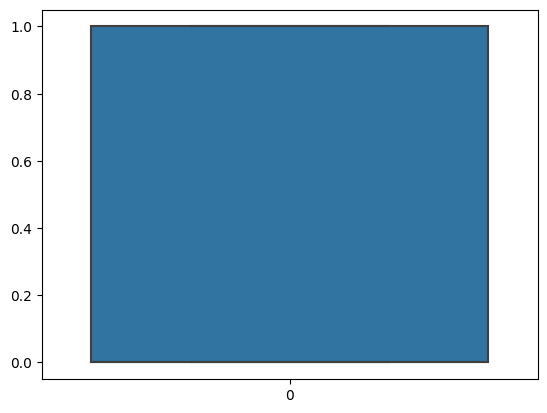

In [ ]:
sns.boxplot(data['Churn'])

<Axes: >

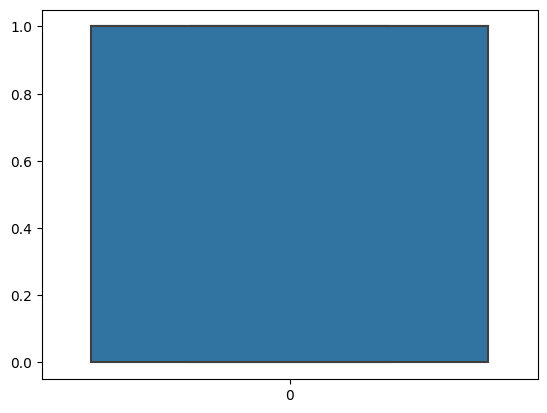

In [ ]:
sns.boxplot(data['PaperlessBilling'])

<Axes: ylabel='MonthlyCharges'>

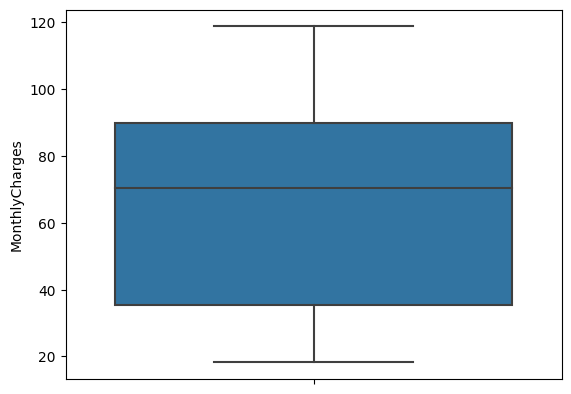

In [ ]:
sns.boxplot(y='MonthlyCharges',data=data)

<Axes: xlabel='TotalCharges'>

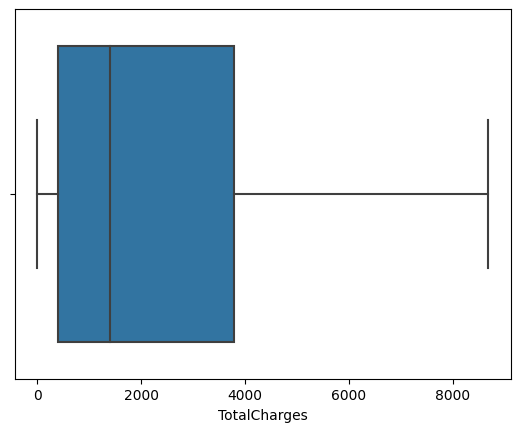

In [ ]:
sns.boxplot(x='TotalCharges',data=data)

In [ ]:
data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,2,29.85,29.85,0
1,34,1,1,0,3,56.95,1889.50,0
2,2,1,0,1,3,53.85,108.15,1
3,45,0,1,0,0,42.30,1840.75,0
4,2,1,0,1,2,70.70,151.65,1


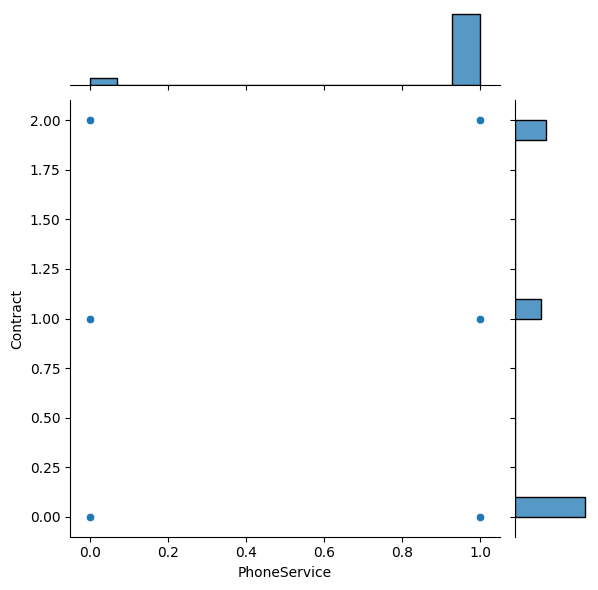

In [ ]:
sns.jointplot(x='PhoneService', y='Contract', data=data)

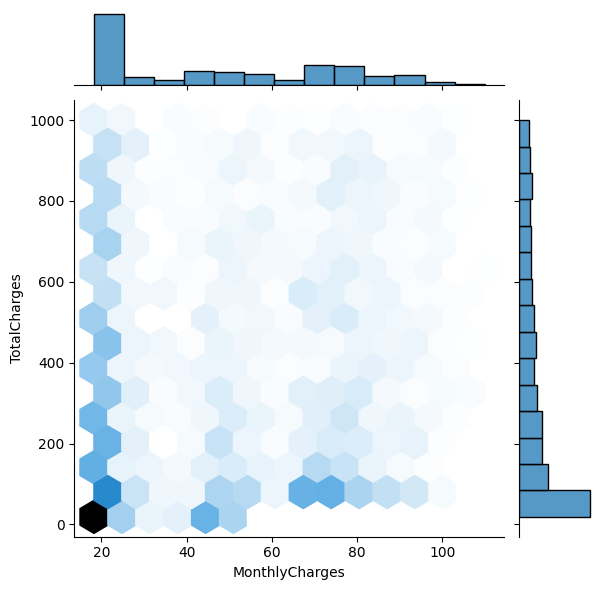

In [ ]:
sns.jointplot(x="MonthlyCharges", y="TotalCharges", data=data.loc[((data['TotalCharges']>0) & (data['TotalCharges']<1000)),:],kind='hex')


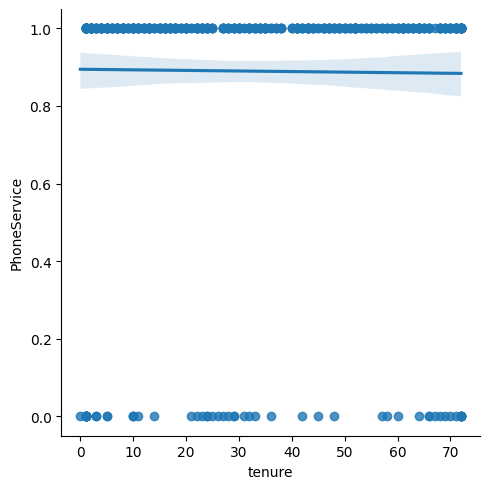

In [ ]:
 sns.lmplot(x='tenure', y='PhoneService', data=data.iloc[:500,:])

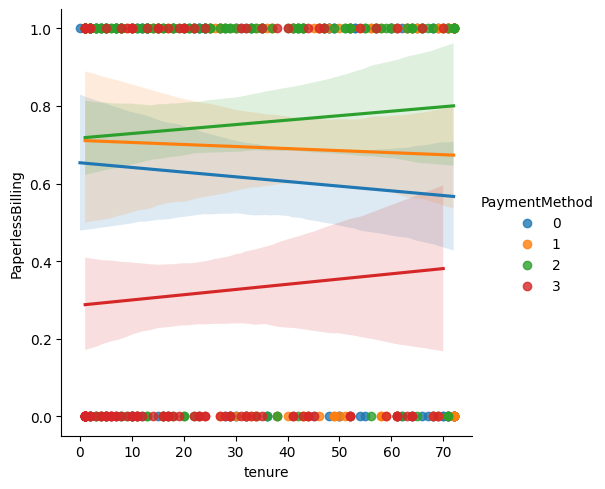

In [ ]:
sns.lmplot(x='tenure', y='PaperlessBilling', data=data.iloc[:500,:], hue='PaymentMethod')

<Axes: xlabel='PaperlessBilling', ylabel='count'>

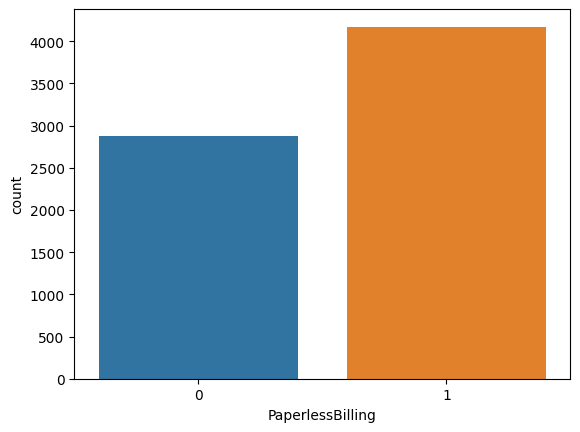

In [ ]:
sns.countplot(x = 'PaperlessBilling', data = data)

<Axes: >

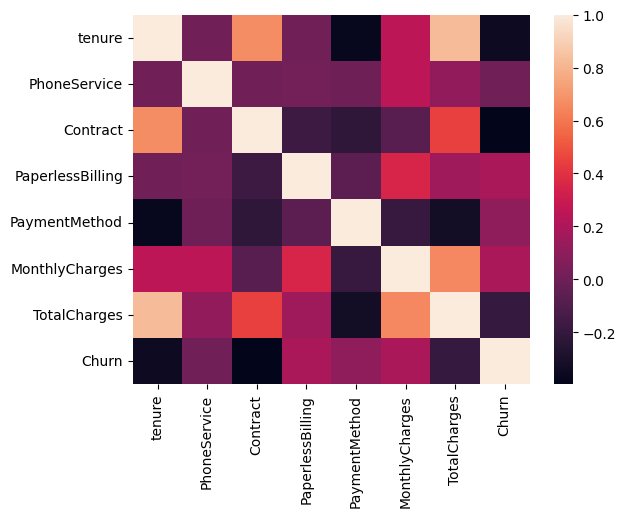

In [ ]:
sns.heatmap(data.corr())

In [ ]:
import pickle

In [ ]:
pickle.dump(model_6, open('model_6.pkl', 'wb'))

In [ ]:
pickled_model_6 = pickle.load(open('model_6.pkl', 'rb'))
pickled_model_6.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
input_data=(5,166,72,19,175,23)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model_6.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
  print('Customer not churned')
else:
  print('Customer is churned')

[0]
Customer not churned


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model_6, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data=(5,166,72,19,175,23)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
  print('Customer not churned')
else:
  print('Customer is churned')

[0]
Customer not churned


In [ ]:
data.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,2,29.85,29.85,0
1,34,1,1,0,3,56.95,1889.50,0
2,2,1,0,1,3,53.85,108.15,1
3,45,0,1,0,0,42.30,1840.75,0
4,2,1,0,1,2,70.70,151.65,1
